## 11. Additional Material: pamtra multipeak spectra


In [28]:
import logging

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import power_law_coeffs
import os
# for this simple example, the databases are not needed
os.environ['PAMTRA_DATADIR'] = ''
import sys
import pyPamtra

sys.path.append('/home/jupyter-jhcustadmin/peakTree/')
import peakTree
import peakTree.helpers as h

%matplotlib inline

In [8]:
Dmean = np.array([
    3.88592306e-06, 5.86216800e-06, 6.77951000e-06, 7.93205340e-06, 
    9.28069691e-06, 1.07100048e-05, 1.24447745e-05, 1.43748377e-05,
    1.65944675e-05, 1.91652704e-05, 2.20864473e-05, 2.53591807e-05,
    2.90504781e-05, 3.32070942e-05, 3.78899845e-05, 4.32051865e-05,
    4.91755140e-05, 5.59504587e-05, 6.36371833e-05, 7.23027870e-05,
    8.20892226e-05, 9.31698268e-05, 1.05707773e-04, 1.19916116e-04,
    1.36012591e-04, 1.54242723e-04, 1.77478306e-04, 2.06819258e-04,
    2.41010897e-04, 2.80855143e-04, 3.27286493e-04, 3.81393937e-04,
    4.44446497e-04, 5.17922991e-04, 6.03546717e-04, 7.03325873e-04,
    8.19600654e-04, 9.55098139e-04, 1.11299625e-03, 1.29699829e-03,
    1.51141979e-03, 1.76128975e-03, 2.05246854e-03, 2.39178541e-03,
    2.78719859e-03])

Dbound = np.array([
       2.40163253e-06, 5.37021359e-06, 6.35412241e-06, 7.20489758e-06,
       8.65920922e-06, 9.90218459e-06, 1.15178250e-05, 1.33717240e-05,
       1.53779514e-05, 1.78109835e-05, 2.05195573e-05, 2.36533373e-05,
       2.70650241e-05, 3.10359321e-05, 3.53782563e-05, 4.04017126e-05,
       4.60086605e-05, 5.23423674e-05, 5.95585499e-05, 6.77158168e-05,
       7.68897572e-05, 8.72886880e-05, 9.90509657e-05, 1.12364581e-04,
       1.27467650e-04, 1.44557532e-04, 1.63927914e-04, 1.91028698e-04,
       2.22609819e-04, 2.59411974e-04, 3.02298311e-04, 3.52274675e-04,
       4.10513199e-04, 4.78379795e-04, 5.57466187e-04, 6.49627248e-04,
       7.57024499e-04, 8.82176809e-04, 1.02801947e-03, 1.19797303e-03,
       1.39602355e-03, 1.62681604e-03, 1.89576346e-03, 2.20917363e-03,
       2.57439719e-03, 3.00000000e-03])


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Diameter [m]', ylabel='Number concentration [m$^{-3}$]'>)

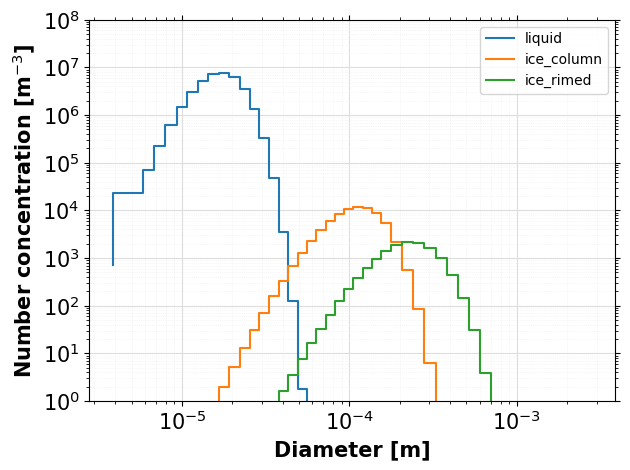

In [12]:
def plot_from_hydromet_dict(d):   
    fig, ax1 = plt.subplots(figsize=[6.4, 4.8])

    for h in d['hydromets']:
        ax1.step(d['Dmean'], 
                 h['n_ds'], label=h['name'])

    ax1.legend()
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.set_xlabel('Diameter [m]', fontweight='semibold', fontsize=15)
    ax1.set_ylabel('Number concentration [m$^{-3}$]', fontweight='semibold', fontsize=15)
    ax1.tick_params(axis='both', which='both', labelsize=15, right=True, top=True)
    ax1.grid(which='major', color='#DDDDDD', linewidth=0.8)
    ax1.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
    ax1.set_ylim(1e0, 1e8)
    fig.tight_layout()
    #fig.savefig(f"{p}/{dt_sel:%Y-%m-%d_%H%M%S}_{height:.0f}m_psd.png")
    return fig, ax1

def modgamma(D, n0, mu, lbd, gamma):
    return n0 * D**mu * np.exp(-lbd * D**gamma)

# a liquid size distribution
nD_liquid = modgamma(Dmean, 2e57, 10, 3e7, 1.4)

# some ice columns
nD_ice = modgamma(Dmean, 8e35, 7.5, 7e5, 1.3)
area_ice_column, mass_ice_column = power_law_coeffs.get_hexagonal_column(Dmean)
# and some (small and weakly) rimed particles
nD_rimed = modgamma(Dmean, 3e32, 7.3, 6e4, 1.1)
area_ice_rimed, mass_ice_rimed = power_law_coeffs.get_maherndl_rimed(Dmean, 0.4)

hydromets = {'Dmean': Dmean, 'Dbound': Dbound}

hydromets['hydromets'] = [
        {'name': 'liquid', 'flag': 1, 
         'scatmodel': 'mie-sphere', 'vtermmodel': 'khvorostyanov01_drops',
         'n_ds': nD_liquid, "rho_ds": np.ones_like(nD_liquid)*1000, 'as_ratio': 1.0,
         'area_ds': np.pi/4. * Dmean ** 2,
         "mass_ds": np.pi/6. * 1000 *  Dmean ** 3,
        },
        {'name': 'ice_column', 'flag': -1, 
         'scatmodel': 'tmatrix', 'vtermmodel': 'heymsfield10_particles',
         'n_ds': nD_ice, 'as_ratio': 1.0,
         "rho_ds": (6*mass_ice_column) / (np.pi*(Dmean**3)), 
         'area_ds': area_ice_column,
         "mass_ds": mass_ice_column,
        },
        {'name': 'ice_rimed', 'flag': -1, 
         'scatmodel': 'tmatrix', 'vtermmodel': 'heymsfield10_particles',
         'n_ds': nD_rimed, 'as_ratio': 1.0,
         "rho_ds": (6*mass_ice_rimed) / (np.pi*(Dmean**3)), 
         'area_ds': area_ice_rimed,
         "mass_ds": mass_ice_rimed,
        },
]

plot_from_hydromet_dict(hydromets)

In [43]:
radarsettings = {'nfft': 512, 'no_ave': 30, 'nyquist': 7.5, 'rg_res': 30, 'frequency': 94}
airturb = 0.02
height = 1000

pam = pyPamtra.pyPamtra()

for hm in hydromets['hydromets']:
    #print(hm)
    pam.df.addHydrometeor((
        hm["name"],  # name 
        -99.,  # aspect ratio (NOT RELEVANT)
        hm["flag"],  # liquid - ice flag
        -99.,  # density (NOT RELEVANT)
        # mass size relation prefactor a exponent b (NOT RELEVANT)
        -99., -99.,
        # area size relation prefactor alpha exponent beta (NOT RELEVANT)
        -99., -99.,
        0,  # moment provided later (NOT RELEVANT)
        Dmean.shape[0],  # number of bins
        "fullBin",  # distribution name (NOT RELEVANT)
        # distribution parameter 1-4 (NOT RELEVANT)
        -99., -99., -99.,  -99.,  
        -99.,  # minimum diameter (NOT RELEVANT)
        -99.,  # maximum diameter (NOT RELEVANT)
        hm["scatmodel"],  # scattering model
        hm["vtermmodel"],  # fall velocity relation
        0.0  # canting angle
    ))

rg_res = radarsettings['rg_res']
hgt_lev = np.arange(height-rg_res,height+rg_res-1,rg_res)
print('hgt_lev', hgt_lev)
pam = pyPamtra.importer.createUsStandardProfile(pam,hgt_lev=hgt_lev)
pam.p["airturb"][:] = airturb
# include vertical motion; negative = away from radar
# pam.nmlSet['radar_airmotion'] = True
# pam.p['wind_w'][:] = -0.3
pam.p['wind_uv'][:] = 10
# pam.p['turb_edr'][:] = 1e-4

# https://pamtra.readthedocs.io/en/latest/settings.html
pam.nmlSet["passive"] = False
pam.nmlSet["randomseed"] = 0
pam.nmlSet["radar_mode"] = "spectrum"
pam.nmlSet["radar_aliasing_nyquist_interv"] = 3
pam.nmlSet["hydro_adaptive_grid"] = False
pam.nmlSet["conserve_mass_rescale_dsd"] = False
pam.nmlSet["radar_use_hildebrand"] = True
pam.nmlSet["hydro_fullspec"] = True

pam.nmlSet["radar_nfft"] = radarsettings['nfft']
pam.nmlSet["radar_no_Ave"] = radarsettings['no_ave']
pam.nmlSet["radar_max_v"] = radarsettings['nyquist']
pam.nmlSet["radar_min_v"] = -1*radarsettings['nyquist']

pam.set["verbose"] = 0
pam.set["pyVerbose"] = 0

pam.df.addFullSpectra()

pam.df.dataFullSpec["d_bound_ds"][0,0,0,:,:] = hydromets['Dbound']
pam.df.dataFullSpec["d_ds"][0,0,0,:,:] = hydromets['Dmean']

for i, hm in enumerate(hydromets['hydromets']):
    #print(i, hm['name'])
    pam.df.dataFullSpec["rho_ds"][0,0,0,i,:] = hm['rho_ds']
    pam.df.dataFullSpec["n_ds"][0,0,0,i,:] = hm['n_ds']
    pam.df.dataFullSpec["area_ds"][0,0,0,i,:] = hm['area_ds']
    pam.df.dataFullSpec["mass_ds"][0,0,0,i,:] = hm['mass_ds']
    pam.df.dataFullSpec["as_ratio"][0,0,0,i,:] = hm['as_ratio']

frequencies = [radarsettings['frequency']]
pam.runPamtra(frequencies)
print('pam fortError?', pam.fortError)

pam_velocity = pam.r['radar_vel'].squeeze()
pam_height = pam.p['hgt'].squeeze()
pam_spectra = pam.r['radar_spectra'].squeeze()



hgt_lev [ 970 1000]
pam fortError? 0


(-65.0, 15.0)

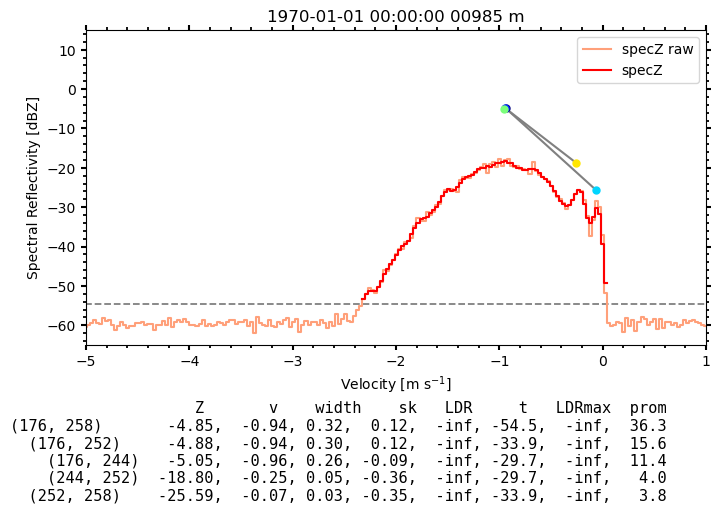

In [44]:
dv = pam_velocity[1] - pam_velocity[0]
noise = h.estimate_noise(h.z2lin(pam_spectra), 3) 

peak_finding_params = {
    'thres_factor_co': 3,
    'prom_thres': 1,
    'width_thres': 0.0,
    'vel_step': dv,
    'span': 0.2,           # m s-1
    'smooth_polyorder': 2,  # 0 deactivate | 2 second order
    'smooth_cut_sequence': 'sc'
}

noise_thres = noise['noise_mean']*peak_finding_params['thres_factor_co']
# ! conventions differ
# pamtra: positive towards radar
# peakTree: negative towards radar
specZ, noise_mask = h.smoothing_cutting(
    h.z2lin(pam_spectra[::-1]), noise_thres, pam_velocity, 
    peak_finding_params['smooth_cut_sequence'], peak_finding_params, logging.getLogger(__name__)
)

spectrum = {
    'vel': pam_velocity,
    'specZ': specZ, 'specZ_raw': h.z2lin(pam_spectra[::-1]),
    'specZ_mask': noise_mask,
    'noise_thres': noise_thres,
    'ts': 0,
    'range': pam_height,
    'polarimetry': 'false',
}

tree = peakTree.generate_tree.tree_from_spectrum_peako(spectrum, peak_finding_params)
fig, ax = peakTree.print_tree.plot_spectrum(tree, spectrum, None)
ax.set_xlim(-5, 1.0)
ax.set_ylim(-65, 15)